# Lecture 3

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Model Evaluation

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# row: actual class; column: predicted class. 
# (Row=1,column=1): predicted = actual = 0


[[48  5]
 [ 4 86]]


In [3]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred)))

Precision score: 0.9451
Recall score: 0.9556
Accuracy score: 0.9371
F1 score: 0.9503


In [4]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

print("AUC for logistic regression: {:.3f}".format(lr_auc))


AUC for logistic regression: 0.988


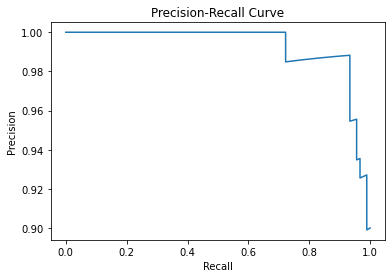

In [5]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = lr.predict_proba(X_test)[::,1]

precision, recall, threshold = precision_recall_curve(y_test,  y_pred_proba)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


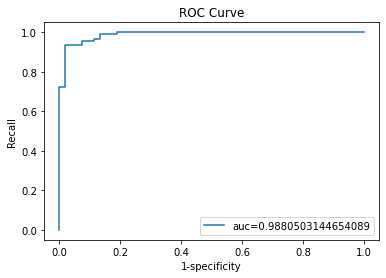

In [6]:
from sklearn.metrics import roc_curve

y_pred_proba = lr.predict_proba(X_test)[::,1]

fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()